In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("C:/Users/edenl/Desktop/file_rouge/notebook/original_data/clean_heart_failure_data.csv")
df

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,12,1,1,41,147,0,1,98,0,10,2,0
1,1,21,0,2,55,40,0,1,82,0,20,1,1
2,2,9,1,1,31,141,0,2,25,0,10,2,0
3,3,20,0,0,39,72,0,1,34,1,25,1,1
4,4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,17,1,3,14,122,0,1,58,0,22,1,1
914,914,40,1,0,45,51,1,1,67,0,42,1,1
915,915,29,1,0,31,9,0,1,41,1,22,1,1
916,916,29,0,1,31,94,0,0,100,0,10,1,1


In [4]:
df = df.drop("Unnamed: 0" , axis=1)

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [6]:
X = df.drop(["HeartDisease" ], axis=1)
# X is the dataframe without the target 

y = df.HeartDisease
#y is the target 

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 



In [8]:
preprocessing_sm = SMOTE(sampling_strategy='auto')


In [9]:

preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])


model_rfc = RandomForestClassifier()

In [12]:
model_rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Using grid search to found best hyper parameters

RandomForestClassifier

accuracy train : 1.000
accuracy test : 0.864
[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1]


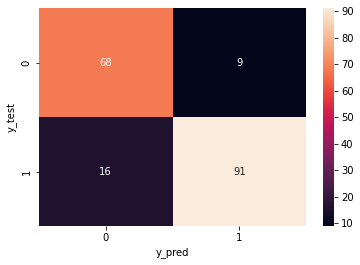

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



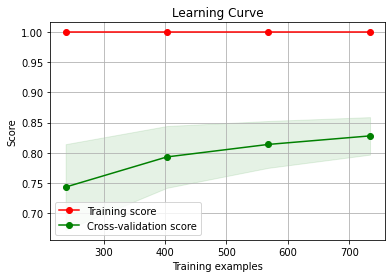

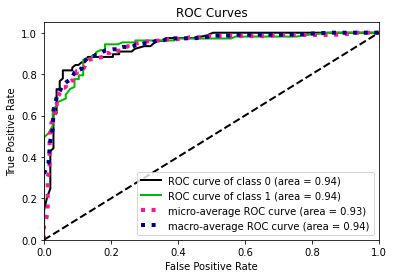

In [14]:
def pipeline_random_forest_classifier():
    pipeline_rfc = imbpipeline(steps = [ ['smote' , preprocessing_sm],
                                    ['RandomForestClassifier', model_rfc]
                                         ])
    pipeline_rfc.fit(X_train , y_train)
    print("accuracy train : %.3f"%pipeline_rfc.score(X_train , y_train))
    print("accuracy test : %.3f"%pipeline_rfc.score(X_test , y_test))
    y_pred_rfc = pipeline_rfc.predict(X_test)
    print(y_pred_rfc)
    cm = confusion_matrix(y_test, y_pred_rfc)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test') 
    plt.show()
    plot_learning_curve(pipeline_rfc, X , y)
    print(classification_report(y_test, y_pred_rfc))
    y_probas_rfc = pipeline_rfc.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas_rfc)
pipeline_random_forest_classifier()

In [23]:

# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = { 
    'n_estimators': [50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create grid search object

clf = GridSearchCV(model_rfc , param_grid)

# Fit on dat': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

best_clf = clf.fit(X_train, y_train)
best_clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 50}

accuracy train : 0.966
accuracy test : 0.875
[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]


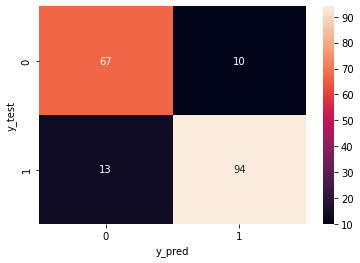

KeyboardInterrupt: 

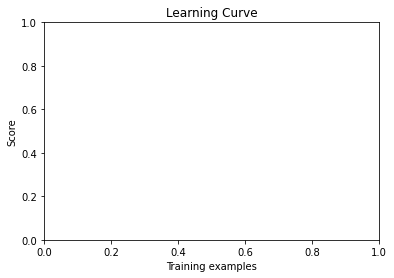

In [24]:
def pipeline_random_forest_classifier_smote():
    pipeline_rfc = Pipeline(steps = [ 
                                     ['standard scaler' , preprocessing_ss],
                                     
                                    ['hyper parameter random forest classifier' , best_clf],
                                         ])
    pipeline_rfc.fit(X_train , y_train)
    print("accuracy train : %.3f"%pipeline_rfc.score(X_train , y_train))
    print("accuracy test : %.3f"%pipeline_rfc.score(X_test , y_test))
    y_pred_rfc = pipeline_rfc.predict(X_test)
    print(y_pred_rfc)
    cm = confusion_matrix(y_test, y_pred_rfc)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test') 
    plt.show()
    plot_learning_curve(pipeline_rfc, X , y)
    print(classification_report(y_test, y_pred_rfc))
    y_probas_rfc = pipeline_rfc.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas_rfc)
pipeline_random_forest_classifier_smote()